## POS tagging using modified Viterbi

### Data Preparation

In [6]:
#Importing libraries
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
nltk.download('universal_tagset')


[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [7]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [8]:
# first few tagged sentences
print(nltk_data[:40])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

### Exploratory Analysis

In [9]:
# converting the list of sents to a list of (word, pos tag) tuples
tagged_words = [tup for sent in nltk_data for tup in sent]
print(len(tagged_words))
tagged_words[:10]

100676


[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET')]

In [10]:
# question 1: Find the number of unique POS tags in the corpus
# you can use the set() function on the list of tags to get a unique set of tags, 
# and compute its length
tags = [pair[1] for pair in tagged_words]
unique_tags = set(tags)
len(unique_tags)

12

In [11]:
# question 2: Which is the most frequent tag in the corpus
# to count the frequency of elements in a list, the Counter() class from collections
# module is very useful, as shown below

from collections import Counter
tag_counts = Counter(tags)
tag_counts

Counter({'NOUN': 28867,
         '.': 11715,
         'NUM': 3546,
         'ADJ': 6397,
         'VERB': 13564,
         'DET': 8725,
         'ADP': 9857,
         'CONJ': 2265,
         'X': 6613,
         'ADV': 3171,
         'PRT': 3219,
         'PRON': 2737})

In [12]:
# the most common tags can be seen using the most_common() method of Counter
tag_counts.most_common(5)

[('NOUN', 28867), ('VERB', 13564), ('.', 11715), ('ADP', 9857), ('DET', 8725)]

In [13]:
# Splitting into train and test
train_set, test_set = train_test_split(nltk_data,test_size=0.05, random_state = 1234)

print(len(train_set))
print(len(test_set))
print(train_set[:40])

3718
196
[[('This', 'DET'), ('year', 'NOUN'), (',', '.'), ('the', 'DET'), ('average', 'NOUN'), ('of', 'ADP'), ('daily', 'ADJ'), ('contracts', 'NOUN'), ('traded', 'VERB'), ('*', 'X'), ('totaled', 'VERB'), ('9,118', 'NUM'), (',', '.'), ('up', 'ADP'), ('from', 'ADP'), ('4,645', 'NUM'), ('a', 'DET'), ('year', 'NOUN'), ('earlier', 'ADJ'), ('and', 'CONJ'), ('from', 'ADP'), ('917', 'NUM'), ('in', 'ADP'), ('1984', 'NUM'), ('.', '.')], [('First', 'NOUN'), ('of', 'ADP'), ('America', 'NOUN'), (',', '.'), ('which', 'DET'), ('*T*-1', 'X'), ('now', 'ADV'), ('has', 'VERB'), ('45', 'NUM'), ('banks', 'NOUN'), ('and', 'CONJ'), ('$', '.'), ('12.5', 'NUM'), ('billion', 'NUM'), ('*U*', 'X'), ('in', 'ADP'), ('assets', 'NOUN'), (',', '.'), ('announced', 'VERB'), ('an', 'DET'), ('agreement', 'NOUN'), ('*', 'X'), ('to', 'PRT'), ('acquire', 'VERB'), ('the', 'DET'), ('Peoria', 'NOUN'), (',', '.'), ('Ill.', 'NOUN'), (',', '.'), ('bank', 'NOUN'), ('holding', 'VERB'), ('company', 'NOUN'), ('in', 'ADP'), ('January',

In [14]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)
train_tagged_words[:10]

[('This', 'DET'),
 ('year', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('average', 'NOUN'),
 ('of', 'ADP'),
 ('daily', 'ADJ'),
 ('contracts', 'NOUN'),
 ('traded', 'VERB'),
 ('*', 'X')]

In [15]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['This',
 'year',
 ',',
 'the',
 'average',
 'of',
 'daily',
 'contracts',
 'traded',
 '*']

In [16]:
# vocabulary
V = set(tokens)
print(len(V))

12073


In [17]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

12

In [18]:
print(T)

{'PRON', 'PRT', 'ADV', 'NOUN', 'DET', 'X', 'VERB', 'CONJ', 'ADP', 'NUM', 'ADJ', '.'}


### Build the vanilla Viterbi based POS tagger

#### Emission Probabilities


In [19]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [20]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [21]:
# examples

# large
print("\n", "has")
print(word_given_tag('has', 'ADJ'))
print(word_given_tag('has', 'VERB'))
print(word_given_tag('has', 'NOUN'), "\n")

# will
print("\n", "will")
print(word_given_tag('FIFA', 'VERB'))
print(word_given_tag('FIFA', 'NOUN'))
print(word_given_tag('FIFA', 'ADJ'))

# book
print("\n", "book")
print(word_given_tag('Atlanta', 'NOUN'))
print(word_given_tag('Atlanta', 'VERB'))


 has
(0, 6063)
(322, 12910)
(0, 27471) 


 will
(0, 12910)
(0, 27471)
(0, 6063)

 book
(6, 27471)
(0, 12910)


#### Transition Probabilities

In [22]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [23]:
# examples
print(t2_given_t1(t2='NOUN', t1='ADJ'))
print(t2_given_t1('NOUN', 'ADJ'))
print(t2_given_t1('NOUN', 'DET'))
print(t2_given_t1('PRON', 'VERB'))
print(t2_given_t1(',', 'PRON'))
print(t2_given_t1('PRT', 'PRT'))
print(t2_given_t1('VBG', 'NNP'))

(4235, 6063)
(4235, 6063)
(5281, 8269)
(456, 12910)
(0, 2619)
(6, 3070)
(0, 0)


In [24]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DET', '.'))
print(t2_given_t1('VERB', '.'))
print(t2_given_t1('NOUN', '.'))
print(t2_given_t1('PRON', '.'))

(1928, 11130)
(988, 11130)
(2483, 11130)
(732, 11130)


In [25]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [22]:
tags_matrix

array([[5.44201257e-03, 1.77772399e-02, 4.61966395e-02, 9.19095427e-03,
        3.95452902e-02, 3.74894193e-03, 1.26980292e-02, 2.41867208e-04,
        6.38650358e-01, 2.23727170e-02, 2.03652188e-01, 4.83734417e-04],
       [1.73225522e-01, 9.40700844e-02, 2.73135677e-02, 9.03863460e-02,
        8.87690932e-02, 6.57681972e-02, 5.19317165e-02, 2.33602873e-03,
        2.23090753e-01, 8.05929899e-02, 4.46540862e-02, 5.77717870e-02],
       [5.41139245e-02, 1.62816450e-01, 7.48417750e-02, 1.44936711e-01,
        2.04113930e-01, 5.63291125e-02, 2.61075944e-02, 1.84651896e-01,
        6.21835440e-02, 2.68987333e-03, 1.64556969e-02, 1.07594933e-02],
       [3.22893351e-01, 3.98423336e-02, 3.50484699e-02, 1.65121984e-02,
        8.52242485e-03, 7.02034757e-02, 1.38489399e-02, 1.49142428e-03,
        3.22893351e-01, 6.20006397e-02, 1.05784595e-01, 9.58772784e-04],
       [1.33617356e-01, 3.51665393e-02, 2.17815652e-01, 9.14020166e-02,
        1.67622000e-01, 3.53214554e-02, 8.35011601e-02, 3.12

In [26]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [27]:
tags_df

,PRON,PRT,ADV,NOUN,DET,X,VERB,CONJ,ADP,NUM,ADJ,.
PRON,0.007637,0.011837,0.032837,0.207331,0.009164,0.093929,0.487972,0.004582,0.023291,0.007255,0.073692,0.040473
PRT,0.017915,0.001954,0.009772,0.247883,0.099674,0.014007,0.402932,0.002280,0.021173,0.056678,0.084039,0.041694
ADV,0.015400,0.014744,0.081258,0.031127,0.068480,0.023263,0.344364,0.006881,0.118611,0.031455,0.129751,0.134666
NOUN,0.004769,0.043974,0.017182,0.264898,0.013250,0.029231,0.146336,0.042263,0.177023,0.009537,0.012231,0.239307
DET,0.003749,0.000242,0.012698,0.638650,0.005442,0.046197,0.039545,0.000484,0.009191,0.022373,0.203652,0.017777
X,0.056329,0.184652,0.026108,0.062184,0.054114,0.074842,0.204114,0.010759,0.144937,0.002690,0.016456,0.162816
VERB,0.035321,0.031216,0.083501,0.110844,0.133617,0.217816,0.167622,0.005577,0.091402,0.022696,0.065221,0.035167
CONJ,0.057369,0.005131,0.055970,0.348881,0.118470,0.008862,0.158582,0.000466,0.052705,0.041511,0.118937,0.033116
ADP,0.070203,0.001491,0.013849,0.322893,0.322893,0.035048,0.008522,0.000959,0.016512,0.062001,0.105785,0.039842
NUM,0.001486,0.027051,0.002973,0.354637,0.002973,0.210464,0.018133,0.013377,0.035672,0.184899,0.032402,0.115933


In [25]:
tags_df.loc['.', :]

DET     0.173226
.       0.094070
X       0.027314
ADP     0.090386
VERB    0.088769
PRON    0.065768
ADV     0.051932
PRT     0.002336
NOUN    0.223091
NUM     0.080593
ADJ     0.044654
CONJ    0.057772
Name: ., dtype: float32

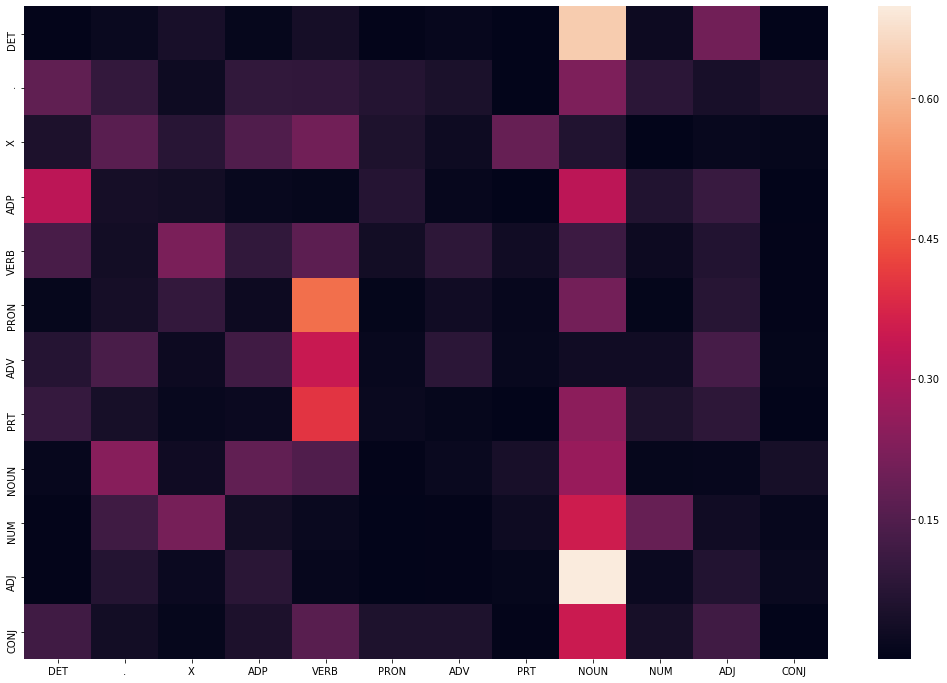

In [26]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

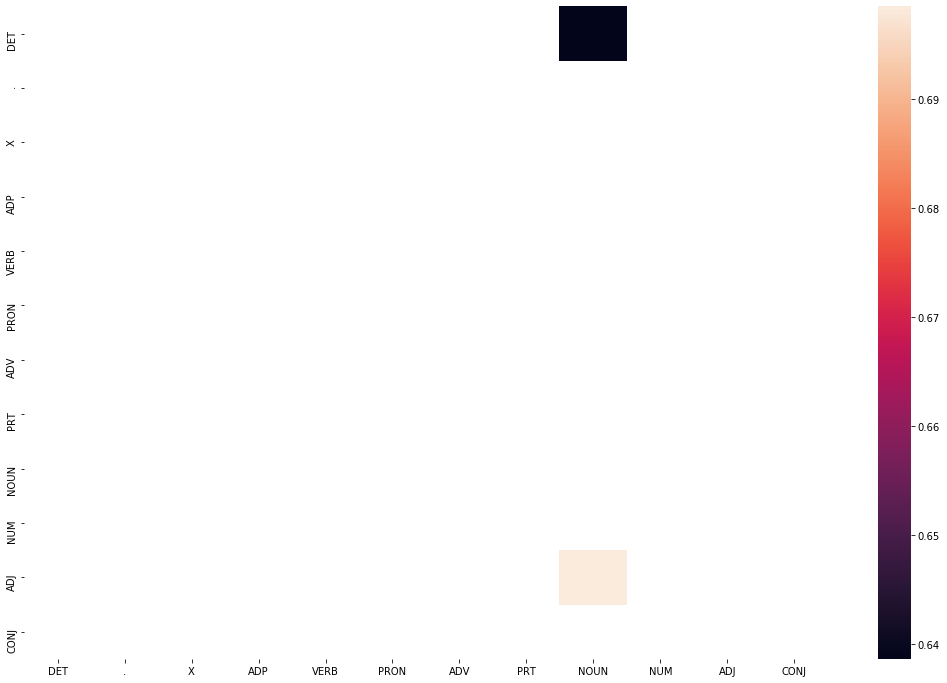

In [27]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

In [28]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [29]:
len(train_tagged_words)

95799

#### Evaluating on Test Set

In [30]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

#random.seed(1234)

# choose random 5 sents
#rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
#test_run = [test_set[i] for i in rndom]

# list of tagged words
#test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
#test_tagged_words = [tup[0] for tup in test_run_base]
#test_tagged_words

# list of tagged words
test_run_base = [tup for sent in test_set for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
test_set

[[('Ruth', 'NOUN'),
  ('K.', 'NOUN'),
  ('Nelson', 'NOUN'),
  ('Cullowhee', 'NOUN'),
  (',', '.'),
  ('N.C', 'NOUN'),
  ('.', '.')],
 [('Among', 'ADP'),
  ('other', 'ADJ'),
  ('Connecticut', 'NOUN'),
  ('banks', 'NOUN'),
  ('whose', 'PRON'),
  ('shares', 'NOUN'),
  ('*T*-121', 'X'),
  ('trade', 'VERB'),
  ('in', 'ADP'),
  ('the', 'DET'),
  ('OTC', 'NOUN'),
  ('market', 'NOUN'),
  (',', '.'),
  ('Society', 'NOUN'),
  ('for', 'ADP'),
  ('Savings', 'NOUN'),
  ('Bancorp', 'NOUN'),
  (',', '.'),
  ('based', 'VERB'),
  ('*', 'X'),
  ('in', 'ADP'),
  ('Hartford', 'NOUN'),
  (',', '.'),
  ('saw', 'VERB'),
  ('its', 'PRON'),
  ('stock', 'NOUN'),
  ('rise', 'VERB'),
  ('1', 'NUM'),
  ('3\\/4', 'NUM'),
  ('to', 'PRT'),
  ('18', 'NUM'),
  ('1\\/4', 'NUM'),
  ('.', '.')],
 [('Card', 'NOUN'),
  ('holders', 'NOUN'),
  ('who', 'PRON'),
  ('*T*-59', 'X'),
  ('receive', 'VERB'),
  ('the', 'DET'),
  ('letter', 'NOUN'),
  ('also', 'ADV'),
  ('are', 'VERB'),
  ('eligible', 'ADJ'),
  ('for', 'ADP'),
  ('a',

In [31]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [32]:
print("Time taken in seconds: ", difference)
print(tagged_seq)
#print(test_run_base)

Time taken in seconds:  1264.9054551124573
[('Ruth', 'DET'), ('K.', 'NOUN'), ('Nelson', 'NOUN'), ('Cullowhee', 'DET'), (',', '.'), ('N.C', 'NOUN'), ('.', '.'), ('Among', 'ADP'), ('other', 'ADJ'), ('Connecticut', 'NOUN'), ('banks', 'NOUN'), ('whose', 'PRON'), ('shares', 'NOUN'), ('*T*-121', 'DET'), ('trade', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('OTC', 'NOUN'), ('market', 'NOUN'), (',', '.'), ('Society', 'NOUN'), ('for', 'ADP'), ('Savings', 'NOUN'), ('Bancorp', 'NOUN'), (',', '.'), ('based', 'VERB'), ('*', 'X'), ('in', 'ADP'), ('Hartford', 'NOUN'), (',', '.'), ('saw', 'VERB'), ('its', 'PRON'), ('stock', 'NOUN'), ('rise', 'VERB'), ('1', 'NUM'), ('3\\/4', 'NUM'), ('to', 'PRT'), ('18', 'NUM'), ('1\\/4', 'NUM'), ('.', '.'), ('Card', 'DET'), ('holders', 'NOUN'), ('who', 'PRON'), ('*T*-59', 'X'), ('receive', 'VERB'), ('the', 'DET'), ('letter', 'NOUN'), ('also', 'ADV'), ('are', 'VERB'), ('eligible', 'ADJ'), ('for', 'ADP'), ('a', 'DET'), ('sweepstakes', 'DET'), ('with', 'ADP'), ('Buick', 'NO

In [33]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [34]:
accuracy = len(check)/len(tagged_seq)


In [35]:
accuracy

0.906704941562436

In [36]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [37]:
incorrect_tagged_cases

[[('.', '.'), (('Ruth', 'DET'), ('Ruth', 'NOUN'))],
 [('Nelson', 'NOUN'), (('Cullowhee', 'DET'), ('Cullowhee', 'NOUN'))],
 [('shares', 'NOUN'), (('*T*-121', 'DET'), ('*T*-121', 'X'))],
 [('*T*-121', 'X'), (('trade', 'NOUN'), ('trade', 'VERB'))],
 [('.', '.'), (('Card', 'DET'), ('Card', 'NOUN'))],
 [('a', 'DET'), (('sweepstakes', 'DET'), ('sweepstakes', 'NOUN'))],
 [('Maxwell', 'NOUN'), (('R.D.', 'DET'), ('R.D.', 'NOUN'))],
 [('R.D.', 'NOUN'), (('Vos', 'DET'), ('Vos', 'NOUN'))],
 [(',', '.'), (('N.Y', 'DET'), ('N.Y', 'NOUN'))],
 [('The', 'DET'), (('Perch', 'DET'), ('Perch', 'NOUN'))],
 [('and', 'CONJ'), (('Dolphin', 'DET'), ('Dolphin', 'NOUN'))],
 [('producing', 'VERB'), (('early', 'ADV'), ('early', 'ADJ'))],
 [('the', 'DET'), (('Seahorse', 'DET'), ('Seahorse', 'NOUN'))],
 [('and', 'CONJ'), (('Tarwhine', 'DET'), ('Tarwhine', 'NOUN'))],
 [('be', 'VERB'), (('refunded', 'DET'), ('refunded', 'VERB'))],
 [('newly', 'ADV'), (('fattened', 'DET'), ('fattened', 'VERB'))],
 [('a', 'DET'), (('dise

The following issues are found
- Some unknown verbs and Nouns are tagged as DET
- The numbers are wrongly tagged as DET
- Some unknown words ('*T*-121') are tagged as DET  
- A noun followed by another noun is tagged as DET

In [39]:
print(tagged_seq)
print(difference)

[('Ruth', 'DET'), ('K.', 'NOUN'), ('Nelson', 'NOUN'), ('Cullowhee', 'DET'), (',', '.'), ('N.C', 'NOUN'), ('.', '.'), ('Among', 'ADP'), ('other', 'ADJ'), ('Connecticut', 'NOUN'), ('banks', 'NOUN'), ('whose', 'PRON'), ('shares', 'NOUN'), ('*T*-121', 'DET'), ('trade', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('OTC', 'NOUN'), ('market', 'NOUN'), (',', '.'), ('Society', 'NOUN'), ('for', 'ADP'), ('Savings', 'NOUN'), ('Bancorp', 'NOUN'), (',', '.'), ('based', 'VERB'), ('*', 'X'), ('in', 'ADP'), ('Hartford', 'NOUN'), (',', '.'), ('saw', 'VERB'), ('its', 'PRON'), ('stock', 'NOUN'), ('rise', 'VERB'), ('1', 'NUM'), ('3\\/4', 'NUM'), ('to', 'PRT'), ('18', 'NUM'), ('1\\/4', 'NUM'), ('.', '.'), ('Card', 'DET'), ('holders', 'NOUN'), ('who', 'PRON'), ('*T*-59', 'X'), ('receive', 'VERB'), ('the', 'DET'), ('letter', 'NOUN'), ('also', 'ADV'), ('are', 'VERB'), ('eligible', 'ADJ'), ('for', 'ADP'), ('a', 'DET'), ('sweepstakes', 'DET'), ('with', 'ADP'), ('Buick', 'NOUN'), ('cars', 'NOUN'), ('or', 'CONJ'), ('a

In [31]:
## Testing
sentence_test = "Android is a mobile operating system developed by Google. Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013. Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose. Twitter is an online news and social networking service on which users post and interact with messages known as tweets. Before entering politics, Donald Trump was a domineering businessman and a television personality. The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years. This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe. Show me the cheapest round trips from Dallas to Atlanta I would like to see flights from Denver to Philadelphia. Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco. NASA invited social media users to experience the launch of ICESAT-2 Satellite."
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq_test = Viterbi(words)
end = time.time()
difference = end-start

In [32]:
print(tagged_seq_test)
print(difference)

[('Android', 'PRON'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'PRON'), ('.', '.'), ('Android', 'PRON'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'PRON'), ('worldwide', 'PRON'), ('on', 'ADP'), ('smartphones', 'PRON'), ('since', 'ADP'), ('2011', 'PRON'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'PRON'), ('.', '.'), ('Google', 'PRON'), ('and', 'CONJ'), ('Twitter', 'PRON'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'PRON'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'PRON'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'PRON'), ("'s", 'VERB'), ('firehose', 'PRON'), ('.', '.'), ('Twitter', 'PRON'), ('is', 'VERB'), ('an', 'DET'), ('online', 'PRON'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'

**Please note the result is changing for each run. Sometimes it is wrongly tagged as DET and sometimes other values such as PRON, ADJ**
**The findings are similar to what observed in incorrect tags in test set**
- Some unknown Nouns (Android) are tagged as DET 
- The numbers (2018) are wrongly tagged as DET
- Some verbs ('invited') as DET


In [40]:
# Let us get the words which are tagged as NUM
print([i for i in tagged_seq_test if i[1] ==  'NUM'])

[('four', 'NUM'), ('3', 'NUM')]


Some nouns and verbs are wrongly tagged as NUM. Let us try to solve this problem in next section

### Solve the problem of unknown words

#### Rule based solution
In this approach the Viterbi algorithm will be modified as below
- Assign all unknown words the most frequent POS tag of the corpus which is NOUN.
- Based on morphological feature. Eg:- ing|ed|es|ould is the ending letters of a VERB generally.
- Words with all digits will be tagged as NUM

In [41]:
import re
def RegexTag(word):
    #Assign most frequent POS tag as the default tag
    tag = 'NOUN'
    if re.match('.*(ing|ed|es|ould)$', word):
        tag = 'VERB' 
    if re.match('(^-?[0-9]+(.[0-9]+)?$)', word):
        tag = 'NUM' 
    return tag

In [42]:
# Viterbi Heuristic Rule Based
def ViterbiRuleBased(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # if probability is zero, it means the word is unknown. 
        if pmax == 0:
            state_max = RegexTag(word)
        else:
            state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [43]:
# tagging the test sentences
start = time.time()
tagged_seq = ViterbiRuleBased(test_tagged_words)
end = time.time()
difference = end-start


In [44]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [45]:
rule_based_accuracy = len(check)/len(tagged_seq)

In [46]:
rule_based_accuracy

0.9501742874718064

In [47]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [48]:
incorrect_tagged_cases

[[('shares', 'NOUN'), (('*T*-121', 'NOUN'), ('*T*-121', 'X'))],
 [('*T*-121', 'X'), (('trade', 'NOUN'), ('trade', 'VERB'))],
 [('a', 'DET'), (('sweepstakes', 'VERB'), ('sweepstakes', 'NOUN'))],
 [('producing', 'VERB'), (('early', 'ADV'), ('early', 'ADJ'))],
 [('a', 'DET'), (('disembodied', 'VERB'), ('disembodied', 'ADJ'))],
 [('disembodied', 'ADJ'), (('male', 'ADJ'), ('male', 'NOUN'))],
 [('.', '.'), (('Otherwise', 'NOUN'), ('Otherwise', 'ADV'))],
 [('the', 'DET'), (('300-day', 'NOUN'), ('300-day', 'ADJ'))],
 [('oldest', 'ADJ'), (('bell-ringing', 'VERB'), ('bell-ringing', 'ADJ'))],
 [('remains', 'VERB'), (('male-only', 'NOUN'), ('male-only', 'ADJ'))],
 [('fact', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))],
 [('that', 'DET'), (('*T*-230', 'NOUN'), ('*T*-230', 'X'))],
 [('*T*-230', 'X'), (("'s", 'PRT'), ("'s", 'VERB'))],
 [('particularly', 'ADV'), (('galling', 'VERB'), ('galling', 'ADJ'))],
 [('the', 'DET'), (('sole', 'NOUN'), ('sole', 'ADJ'))],
 [("'s", 'PRT'), (('short-lived', 'VERB')

**Findings**
- The problems found in the original Viterbi alogorithm are solved
- There are some other errors due to the approach that all unknown words are assumed to be NOUN first. As a result some verbs, adjectives and adverbs are wrongly tagged as NOUN


In [50]:
## Testing
sentence_test = "Android is a mobile operating system developed by Google. Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013. Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose. Twitter is an online news and social networking service on which users post and interact with messages known as tweets. Before entering politics, Donald Trump was a domineering businessman and a television personality. The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years. This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe. Show me the cheapest round trips from Dallas to Atlanta I would like to see flights from Denver to Philadelphia. Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco. NASA invited social media users to experience the launch of ICESAT-2 Satellite."
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = ViterbiRuleBased(words)
end = time.time()
difference = end-start


In [51]:
print(tagged_seq)
print(difference)

[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'VERB'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), (

#### Probability Based Solution
- For words in the corpus, state probability = transition probability * emission probability
- For words not in the corpus, state probability = transition probability

#### Evaluating tagging accuracy

In [52]:
# Viterbi Heuristic Rule Based
def ViterbiProbabilityBased(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        trans_prob = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            trans_prob.append(transition_p)
            
        pmax = max(p)
        # if probability is zero, it means the word is unknown. 
        if pmax == 0:
            pmax = max(trans_prob)
            state_max = T[trans_prob.index(pmax)] 
        else:
            state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [53]:
# tagging the test sentences
start = time.time()
tagged_seq = ViterbiProbabilityBased(test_tagged_words)
end = time.time()
difference = end-start
difference

1271.9475994110107

In [55]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [56]:
prob_based_accuracy = len(check)/len(tagged_seq)

In [57]:
prob_based_accuracy

0.9360262456428132

In [58]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [59]:
incorrect_tagged_cases

[[('shares', 'NOUN'), (('*T*-121', 'NOUN'), ('*T*-121', 'X'))],
 [('*T*-121', 'X'), (('trade', 'NOUN'), ('trade', 'VERB'))],
 [('producing', 'VERB'), (('early', 'ADV'), ('early', 'ADJ'))],
 [('be', 'VERB'), (('refunded', 'X'), ('refunded', 'VERB'))],
 [('a', 'DET'), (('disembodied', 'NOUN'), ('disembodied', 'ADJ'))],
 [('.', '.'), (('Otherwise', 'NOUN'), ('Otherwise', 'ADV'))],
 [('the', 'DET'), (('300-day', 'NOUN'), ('300-day', 'ADJ'))],
 [('oldest', 'ADJ'), (('bell-ringing', 'NOUN'), ('bell-ringing', 'ADJ'))],
 [('in', 'ADP'), (('1637', 'DET'), ('1637', 'NUM'))],
 [('remains', 'VERB'), (('male-only', 'X'), ('male-only', 'ADJ'))],
 [('fact', 'NOUN'), (('that', 'ADP'), ('that', 'DET'))],
 [('that', 'DET'), (('*T*-230', 'DET'), ('*T*-230', 'X'))],
 [('particularly', 'ADV'), (('galling', 'VERB'), ('galling', 'ADJ'))],
 [('the', 'DET'), (('sole', 'NOUN'), ('sole', 'ADJ'))],
 [("'s", 'PRT'), (('Cathedral', 'VERB'), ('Cathedral', 'NOUN'))],
 [("'s", 'PRT'), (('short-lived', 'VERB'), ('short

In [60]:
## Testing
sentence_test = "Android is a mobile operating system developed by Google. Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013. Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose. Twitter is an online news and social networking service on which users post and interact with messages known as tweets. Before entering politics, Donald Trump was a domineering businessman and a television personality. The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years. This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe. Show me the cheapest round trips from Dallas to Atlanta I would like to see flights from Denver to Philadelphia. Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco. NASA invited social media users to experience the launch of ICESAT-2 Satellite."
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = ViterbiProbabilityBased(words)
end = time.time()
difference = end-start


In [62]:
print(tagged_seq)
print(difference)

[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'DET'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'DET'), ('since', 'ADP'), ('2011', 'DET'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'DET'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'DET'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'X'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'VERB'), ("'s", 'PRT'), ('firehose', 'VERB'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), ('user

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

- The accuracy for the original vannilla Viterbi algorithm is 0.906704941562436

- The rule based solution imporved the accuracy by 5% and new accuracy is 0.9501742874718064

- The probability based solution imporved the accuracy by 3% and new accuracy is 0.9360262456428132

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

The following cases were incorrectly tagged by original POS tagger
- Some unknown verbs and Nouns are tagged as DET
- The numbers are wrongly tagged as DET
- Some unknown words are tagged as DET  
- A noun followed by another noun is tagged as DET

**Please note the result is changing for each run. Sometimes it is wrongly tagged as DET and sometimes other values such as PRON, ADJ**

**Rule based algorithm**

The modifications done in Rule based algorithm eliminated all the above issues but it still has following issues
- All unknown words are assumed to be NOUN first. As a result some verbs, adjectives and adverbs are wrongly tagged as NOUN
- Some NOUNs are also wrongly tagged as VERB
- Examples for correction
    - ('Android', 'DET') -('Android', 'NOUN')
    - ('2018', 'DET') - ('2018', 'NUM')
    - ('invited', 'DET') - ('invited', 'VERB')
    


**Probability based algorithm**

The modifications done in Probability based algorithm did not eliminate all issues found in original Vanilla Viterbi algorithm. This algorithm has following issues.
- Some unknown verbs and Nouns are still tagged as DET
- Some numbers are still tagged as DET
- Some unknown words are tagged as DET
- Some ADJ are wrongly tagged as NOUN
- Examples for correction
    - ('Android', 'DET') - ('Android', 'NOUN')
    - ('NASA', 'PRON') - ('NASA', 'NOUN')
    - ('Satellite', 'PRON') - ('Satellite', 'NOUN')
    

**Conclusion**
- The Rule based algorithm gives a better accuracy than probability based algorithm and the original Vanilla Viterbi Algorithm.
- May be we could use probability algorithm first and then use Rule based algorithm as a back off algorithm to get better results.